# Tutorial on Reproducing an Article

This notebook reproduces the figures contained in the article [D. Herb, M. Rossini, J. Ankerhold, PRE 109, 064413 (2024)](https://doi.org/10.1103/PhysRevE.109.064413). For a detailed explanation we refer to this article. 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.png)](https://colab.research.google.com/github/dehe1011/QuantumDNA-notebooks/blob/main/tutorials/PRE2024.ipynb)

In [1]:
%load_ext autoreload
%autoreload 2

# Save flag: Set to True to enable saving results (currently unused in this script)
save = False

# Verbose flag: Set to True to enable detailed logging
verbose = False

## Setup 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# Installation of QuantumDNA
# --------------------------

from importlib.util import find_spec

qDNA_installed = find_spec('qDNA') is not None

if not qDNA_installed:
    %pip install qDNA
    print("Successfully installed the 'qDNA' package.")
else:
    print("Package 'qDNA' is already installed.")

if verbose:
    %pip show qDNA  

from qDNA import *

# ------------------------
# Directory Setup
# ------------------------

import os
DATA_DIR_QDNA = DATA_DIR

# Use the current working directory as the root
ROOT_DIR = os.getcwd()

# Define directories to load data
DATA_DIR = os.path.join(DATA_DIR_QDNA, "raw", "data_paper")

# Define directory to save data/ figu
SAVE_DIR = os.path.join(ROOT_DIR, "data", "my_figures")
os.makedirs(SAVE_DIR, exist_ok=True)

# Define the directory to load figures
FIG_DIR = os.path.join(DATA_DIR_QDNA, "raw", "figures_tutorials")

if verbose:
    print(f"Data directory: '{DATA_DIR}' is ready.")
    print(f"Save directory: '{SAVE_DIR}' is ready.")
    print(f"Figures directory: '{FIG_DIR}' is ready.")

Package 'qDNA' is already installed.


## Main body

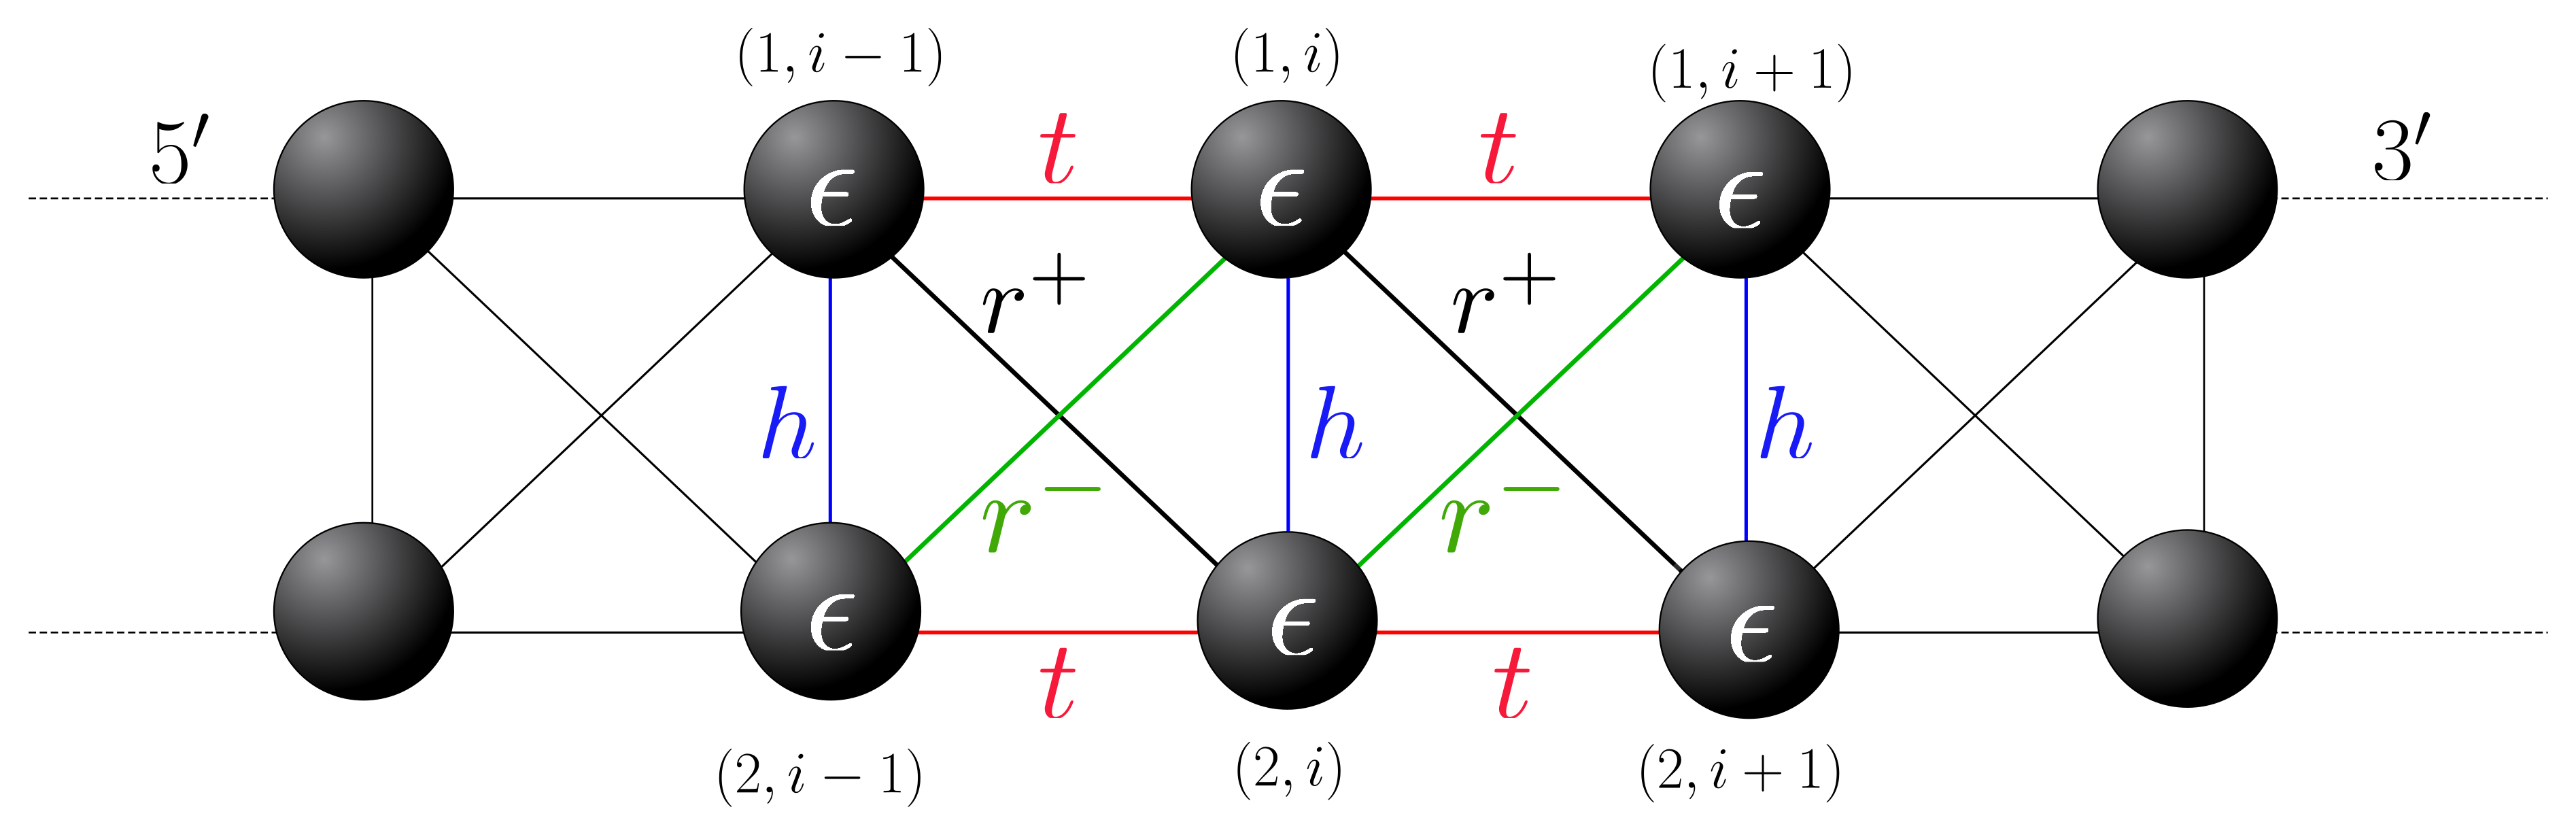

In [3]:
from IPython.display import Image
Image(filename=os.path.join(FIG_DIR,'Fig_1.png'), width=800)

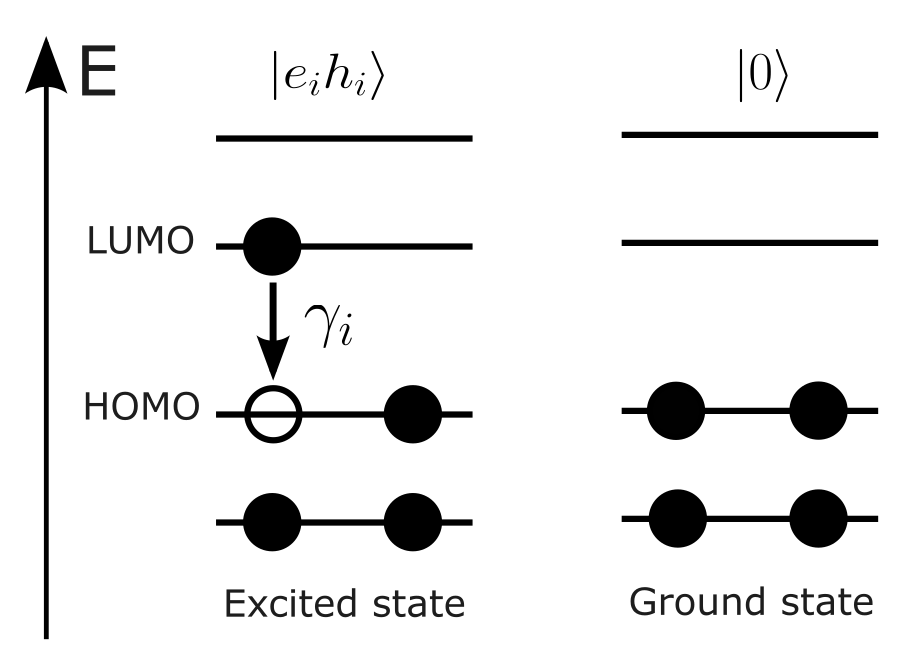

In [4]:
from IPython.display import Image
Image(filename=os.path.join(FIG_DIR,'Fig_2.png'), width=400)

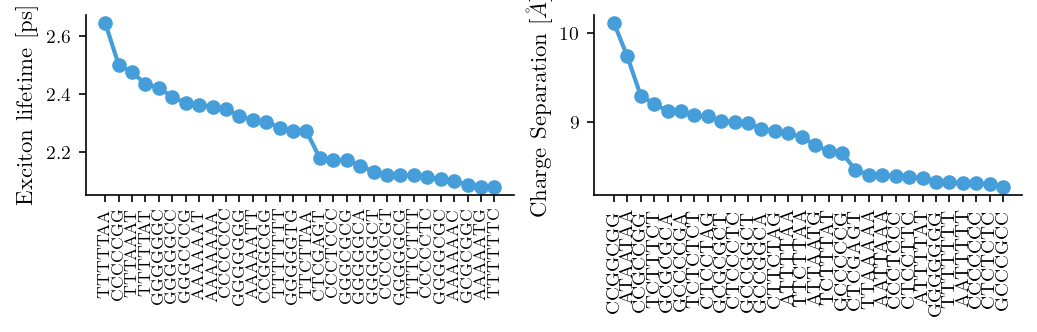

In [5]:
def fig3(top_num = 30):
    
    # data preparation lifetimes
    lifetime_dict = load_json(os.path.join(DATA_DIR, 'lifetime_7bp_J0.json'))['data']
    lifetime_dict = sorted_dict(lifetime_dict)
    dna_seqs_lifetime = list(lifetime_dict.keys())[:top_num]
    lifetimes = np.array(list(lifetime_dict.values()))[:top_num]/1000 # in ps

    # data preparation dipoles
    dipole_dict = load_json(os.path.join(DATA_DIR, 'dipole_7bp_J0.json'))['data']
    dipole_dict = sorted_dict(dipole_dict)
    dna_seqs_dipole = list(dipole_dict.keys())[:top_num]
    dipoles = list(dipole_dict.values())[:top_num]
    
    # plotting
    fig, ax = plt.subplots(1, 2, figsize= (6.8, 2.1) )
    
    ax[0].plot(dna_seqs_lifetime, lifetimes, ls='-', marker='.', ms=12)
    ax[0].set_ylabel(r'Exciton lifetime [ps]')
    ax[0].set_xticks(dna_seqs_lifetime)
    ax[0].set_xticklabels(labels = dna_seqs_lifetime, rotation=90, fontsize=8)
    
    ax[1].plot(dna_seqs_dipole, dipoles, ls='-', marker='.', ms=12)
    ax[1].set_ylabel(r'Charge Separation [$\AA$]') 
    ax[1].set_xticks(dna_seqs_dipole)
    ax[1].set_xticklabels(labels = dna_seqs_dipole, rotation=90)
    
    return fig 

fig = fig3()
if save:
    save_figure(fig, 'Fig_3', SAVE_DIR, extension='pdf')
plt.show()

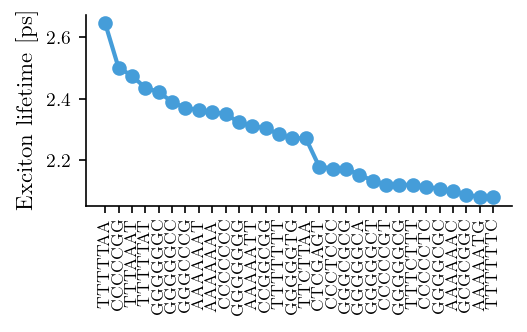

In [6]:
def fig3a(top_num = 30):

    # data preparation
    lifetime_dict = load_json(os.path.join(DATA_DIR, 'lifetime_7bp_J0.json'))['data']
    lifetime_dict = sorted_dict(lifetime_dict)
    dna_seqs = list(lifetime_dict.keys())[:top_num]
    lifetimes = np.array(list(lifetime_dict.values()))[:top_num]/1000
    
    # plotting
    fig, ax = plt.subplots()
    ax.plot(dna_seqs, lifetimes, ls='-', marker='.', ms=12)
    ax.set_ylabel(r'Exciton lifetime [ps]')
    ax.set_xticks(dna_seqs)
    ax.set_xticklabels(labels = dna_seqs, rotation=90, fontsize=8)

    return fig

fig = fig3a()
if save:
    save_figure(fig, 'Fig_3a', SAVE_DIR, extension='pdf')
plt.show()

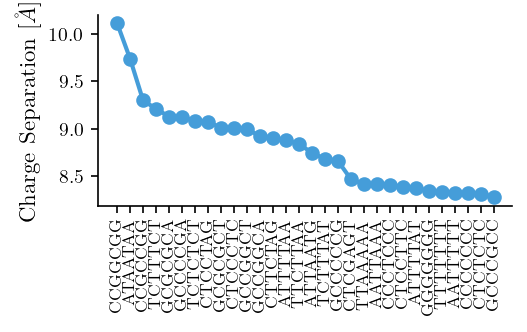

In [7]:
from qDNA import load_json, save_figure, sorted_dict

def fig3b(top_num = 30):
    
    # data preparation
    dipole_dict = load_json(os.path.join(DATA_DIR, 'dipole_7bp_J0.json'))['data']
    dipole_dict = sorted_dict(dipole_dict)
    dna_seqs = list(dipole_dict.keys())[:top_num]
    dipoles = list(dipole_dict.values())[:top_num]
    
    # plotting
    fig, ax = plt.subplots()
    ax.plot(dna_seqs, dipoles, ls='-', marker='.', ms=12)
    ax.set_ylabel(r'Charge Separation [$\AA$]') 
    ax.set_xticks(dna_seqs)
    ax.set_xticklabels(labels = dna_seqs, rotation=90, fontsize=8)
    
    return fig

fig = fig3b()
if save:
    save_figure(fig, 'Fig_3b', SAVE_DIR, extension='pdf')
plt.show()

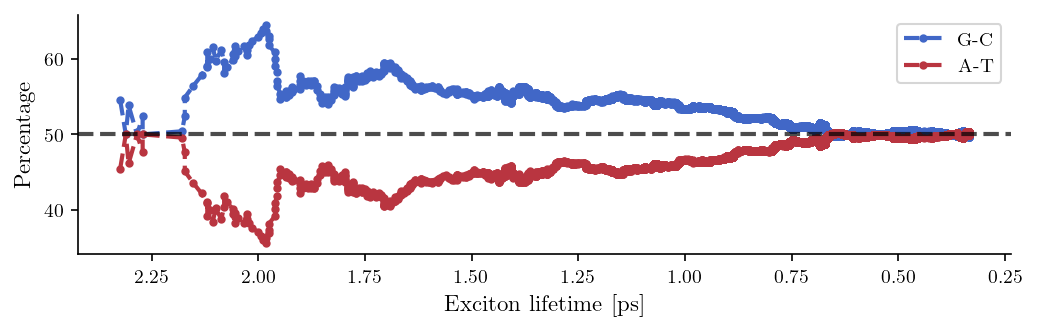

In [8]:
def fig4():
    # data preparation
    # dipole_dict = load_json(os.path.join(DATA_DIR, 'dipole_7bp_J0.json'))['data']
    lifetime_dict = load_json(os.path.join(DATA_DIR, 'lifetime_7bp_J0.json'))['data'] 
    lifetime_dict = sorted_dict(lifetime_dict)
    
    # plotting
    fig, ax = plot_base_frequency(lifetime_dict)

    return fig

fig = fig4()
if save:
    save_figure(fig, 'Fig_4', SAVE_DIR, format='pdf')
plt.show()

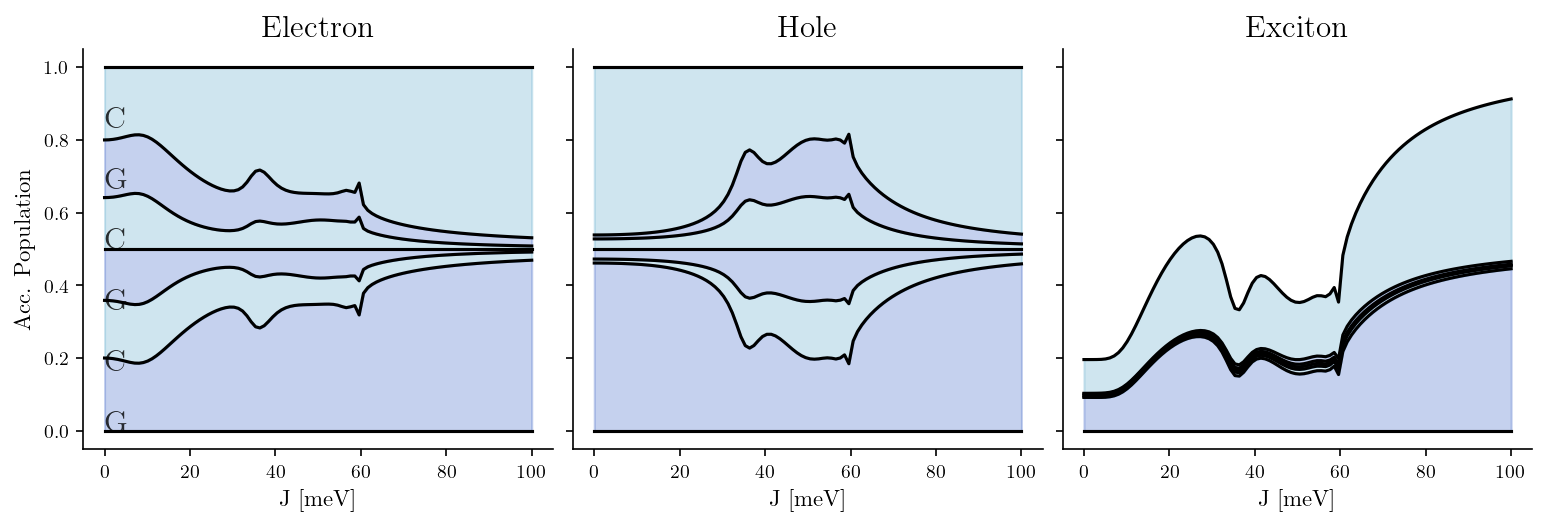

In [9]:
def fig5a(source = 'Simserides2014',
          upper_strand = 'GCGCGC', 
          tb_model_name = 'WM',
          J_list = np.linspace(0, 100, 100), 
          J_unit = 'meV'):

    tb_sites = get_tb_sites(upper_strand, tb_model_name=tb_model_name)
    vis = Visualization(tb_sites, tb_model_name=tb_model_name, source=source)
    vis.plot_average_pop(J_list, J_unit)

fig5a()
if save:
    save_figure(fig, 'Fig_5a', SAVE_DIR, extension='pdf')
plt.show()

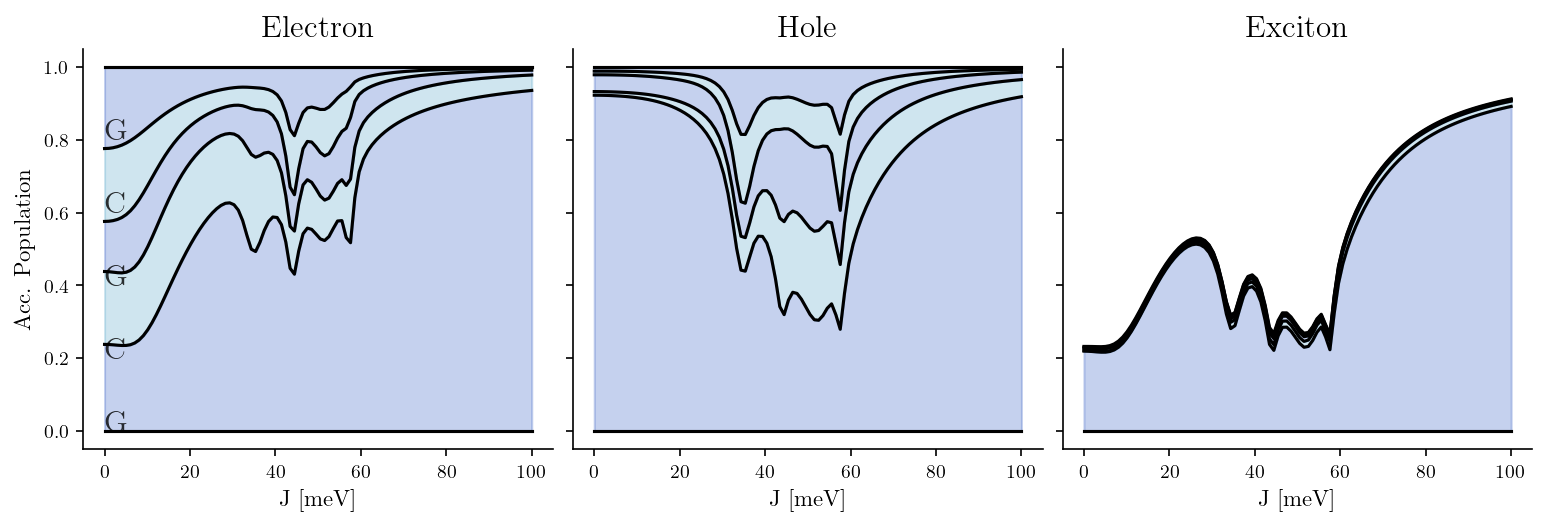

In [10]:
def fig5b(source = 'Simserides2014',
          upper_strand = 'GCGCG', 
          tb_model_name = 'WM',
          J_list = np.linspace(0, 100, 100), 
          J_unit = 'meV'):

    tb_sites = get_tb_sites(upper_strand, tb_model_name=tb_model_name)
    vis = Visualization(tb_sites, tb_model_name=tb_model_name, source=source)
    vis.plot_average_pop(J_list, J_unit)

fig5b()
if save:
    save_figure(fig, 'Fig_5a', SAVE_DIR, extension='pdf')
plt.show()

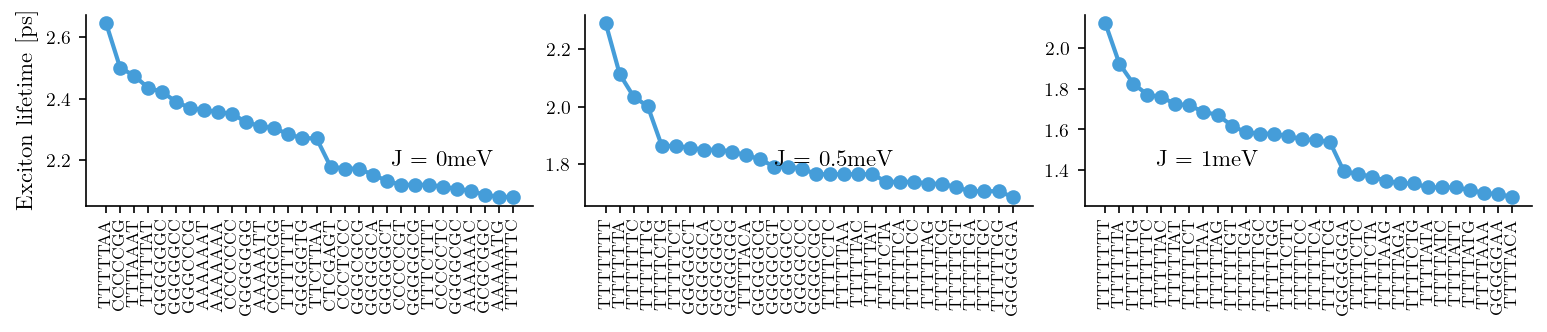

In [11]:
# parameters
def fig6(top_num = 30):
    
    # plotting
    fig, ax = plt.subplots(1, 3, figsize= (3.4*3,2.1) )
    
    for i, J in enumerate([0,0.5,1]):

        lifetime_dict = load_json(os.path.join(DATA_DIR, f'lifetime_7bp_J{J}.json'))['data']
        lifetime_dict = sorted_dict(lifetime_dict)
        dna_seqs_lifetime = list(lifetime_dict.keys())[:top_num]
        lifetimes = np.array(list(lifetime_dict.values()))[:top_num]/1000
    
        ax[i].plot(dna_seqs_lifetime, lifetimes, ls="-", marker='.', markersize=12)
        ax[i].set_xticks(dna_seqs_lifetime)
        ax[i].set_xticklabels(labels = dna_seqs_lifetime, rotation=90, fontsize=8)
        fig.text(0.25*(i+1),0.5, f'J = {J}meV')
    
    ax[0].set_ylabel('Exciton lifetime [ps]')

fig = fig6()
if save:
    save_figure(fig, 'Fig_6', SAVE_DIR, extension='pdf')
plt.show()

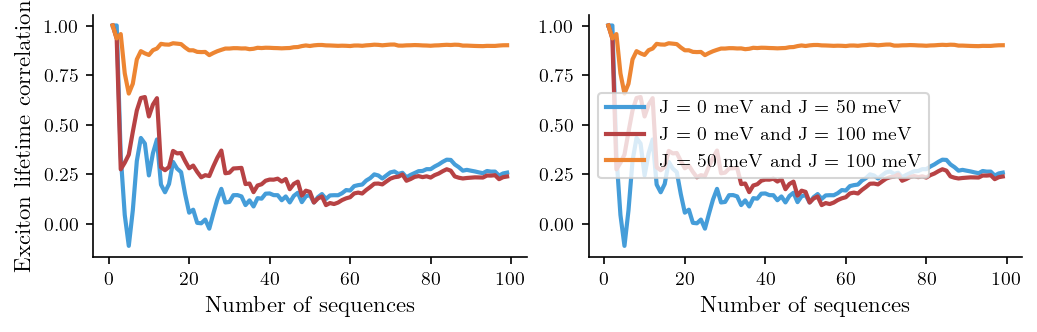

In [12]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

def fig7(num_sequences = 101):

    directory = DATA_DIR
    dominant_filename = 'lifetime_7bp_J0.json'
    
    fig, ax = plt.subplots(1,2, figsize=(6.8,2.1))
    for J1, J2 in [[0,0.5],[0,1],[0.5,1]]:
        filename1, filename2 = f'lifetime_7bp_J{J1}.json', f'lifetime_7bp_J{J2}.json'
        A = get_sorted_dict(dominant_filename, filename1, directory)
        B = get_sorted_dict(dominant_filename, filename2, directory)
        corr_list=[]
        for x in range(1,num_sequences):
            corr_list.append( np.corrcoef(list(B.values())[:x],list(A.values())[:x])[0, 1] )
        ax[0].plot(corr_list[:num_sequences])
        ax[1].plot(corr_list[:num_sequences])
    
    ax[1].legend([r'J = 0 meV and J = 50 meV','J = 0 meV and J = 100 meV','J = 50 meV and J = 100 meV'])
    ax[0].set_ylabel('Exciton lifetime correlation')
    ax[0].set_xlabel('Number of sequences')
    ax[1].set_xlabel('Number of sequences')

    return fig

fig = fig7()
if save:
    save_figure(fig, 'Fig_7', SAVE_DIR, extension='pdf')
plt.show()

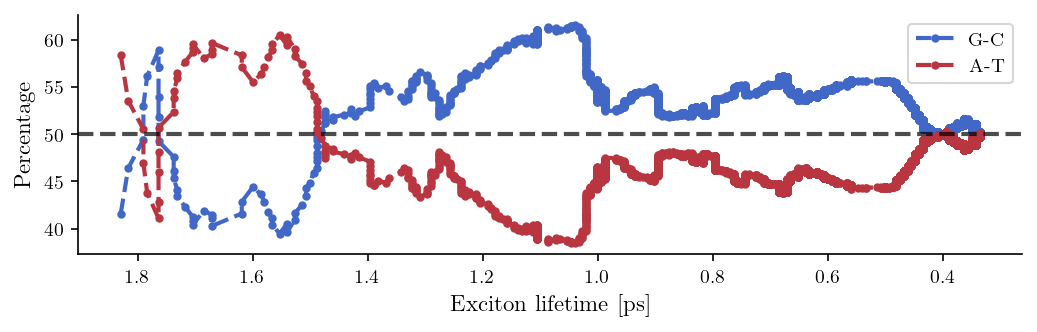

In [13]:
def fig8a():
       
    lifetime_dict = load_json(os.path.join(DATA_DIR, 'lifetime_7bp_J0.5.json'))['data']
    lifetime_dict = sorted_dict(lifetime_dict)
    
    # plotting
    fig, ax = plot_base_frequency(lifetime_dict)

    return fig

fig = fig8a()
if save:
    save_figure(fig, 'Fig_8a', SAVE_DIR, extension='pdf')
plt.show()

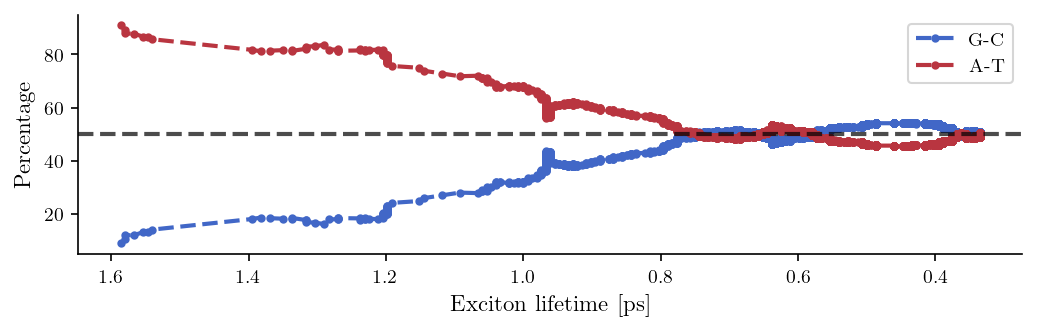

In [14]:
def fig8b():
    
    lifetime_dict = load_json(os.path.join(DATA_DIR, 'lifetime_7bp_J1.json'))['data']
    lifetime_dict = sorted_dict(lifetime_dict)
    
    # plotting
    fig, ax = plot_base_frequency(lifetime_dict)

    return fig

fig = fig8b()
if save:
    save_figure(fig, 'Fig_8b', SAVE_DIR, extension='pdf')
plt.show()

## Supplementary Material

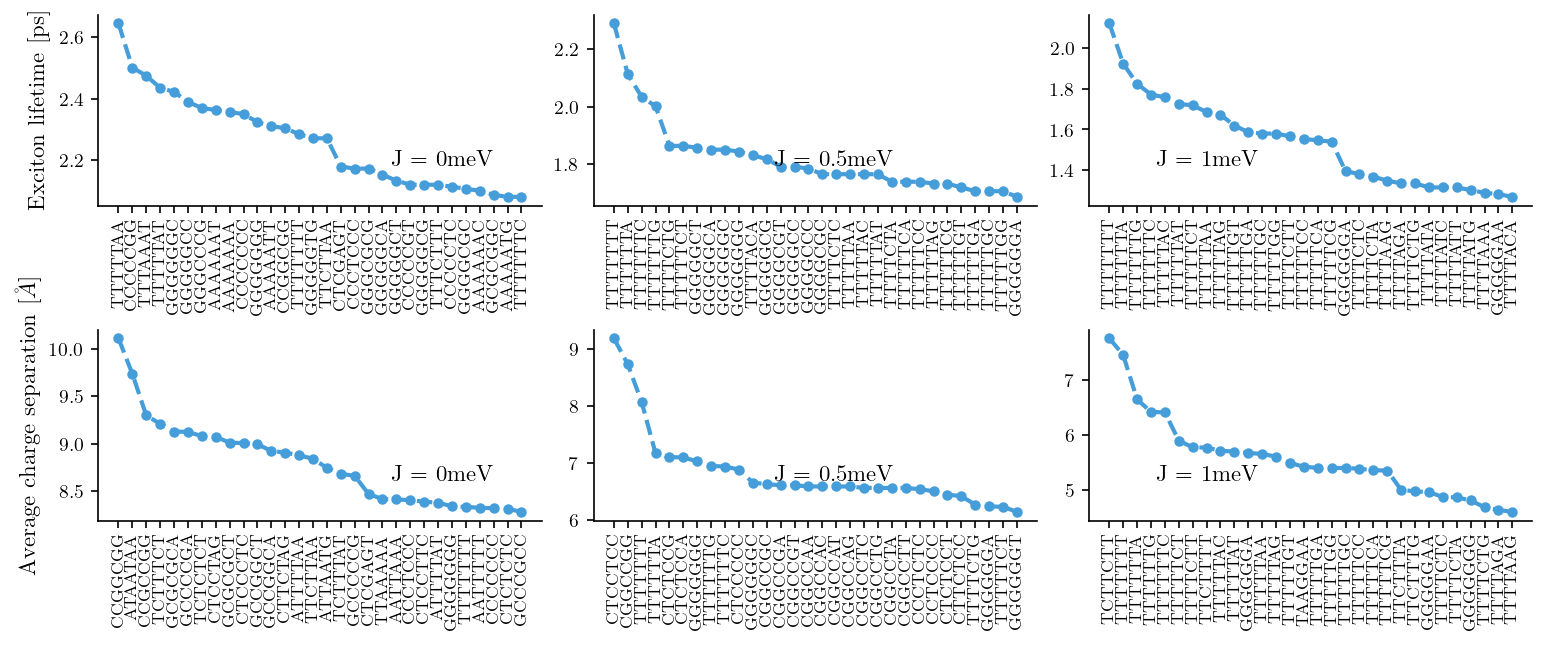

In [15]:
from qDNA import load_json, save_figure

def figS1(top_num = 30):

    fig, ax = plt.subplots(2, 3, figsize= (3.4*3, 2*2.1) )
    
    for i, J in enumerate([0,0.5,1]):
        lifetime_dict = load_json(os.path.join(DATA_DIR, f'lifetime_7bp_J{J}.json'))['data']
        lifetime_dict = sorted_dict(lifetime_dict)
        dipole_dict = load_json(os.path.join(DATA_DIR, f'dipole_7bp_J{J}.json'))['data']
        dipole_dict = sorted_dict(dipole_dict)

        dna_seqs_lifetime = list(lifetime_dict.keys())[:top_num]
        lifetimes = np.array(list(lifetime_dict.values()))[:top_num]/1000
        dna_seqs_dipole = list(dipole_dict.keys())[:top_num]
        dipoles = list(dipole_dict.values())[:top_num]
    
        ax[0,i].plot(dna_seqs_lifetime, lifetimes, ls='--', marker='.')
        ax[0,i].set_xticks(dna_seqs_lifetime)
        ax[0,i].set_xticklabels(labels = dna_seqs_lifetime, rotation=90, fontsize=8)
        ax[1,i].plot(dna_seqs_dipole, dipoles, ls='--', marker='.')
        ax[1,i].set_xticks(dna_seqs_dipole)
        ax[1,i].set_xticklabels(labels = dna_seqs_dipole, rotation=90, fontsize=8)
        fig.text(0.25*(i+1),0.75, f'J = {J}meV')
        fig.text(0.25*(i+1),0.25, f'J = {J}meV')
    
    ax[0,0].set_ylabel(r'Exciton lifetime [ps]')
    ax[1,0].set_ylabel(r'Average charge separation [$\AA$]')

    return fig

fig = figS1()
if save:
    save_figure(fig, 'Fig_S1', SAVE_DIR, extension='pdf')
plt.show()

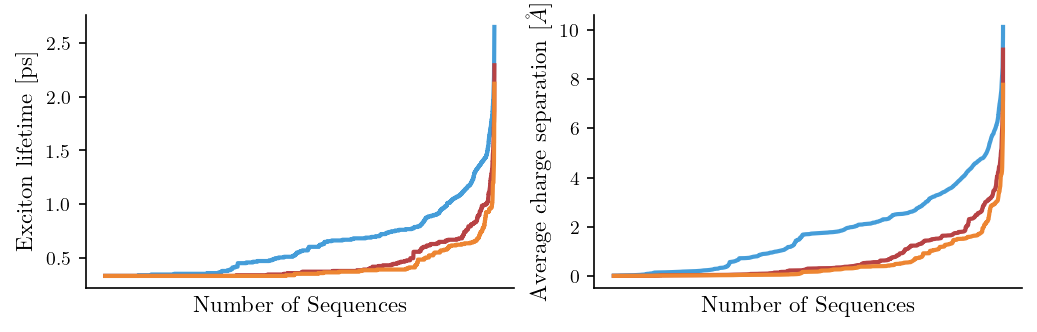

In [16]:
from qDNA import load_json, save_figure

def figS2():
    fig, ax = plt.subplots(1, 2, figsize= (3.4*2, 2.1) )
    
    for J in [0,0.5,1]:
        lifetime_dict = load_json(os.path.join(DATA_DIR, f'lifetime_7bp_J{J}.json'))['data']
        lifetime_dict = sorted_dict(lifetime_dict)
        dipole_dict = load_json(os.path.join(DATA_DIR, f'dipole_7bp_J{J}.json'))['data']
        dipole_dict = sorted_dict(dipole_dict)
        ax[0].plot( np.array( list(lifetime_dict.values())[::-1] )/1000 )
        ax[1].plot( list(dipole_dict.values())[::-1] )
    
    ax[0].set_ylabel(r'Exciton lifetime [ps]')
    ax[1].set_ylabel(r'Average charge separation [$\AA$]') 
    ax[0].set_xlabel("Number of Sequences")
    ax[1].set_xlabel("Number of Sequences")
    
    for axis in ax:
        axis.tick_params(axis="x", which="both", bottom=False, labelbottom=False)

    return fig

fig = figS2()
if save:
    save_figure(fig, 'Fig_S2', SAVE_DIR, extension='pdf')
plt.show()

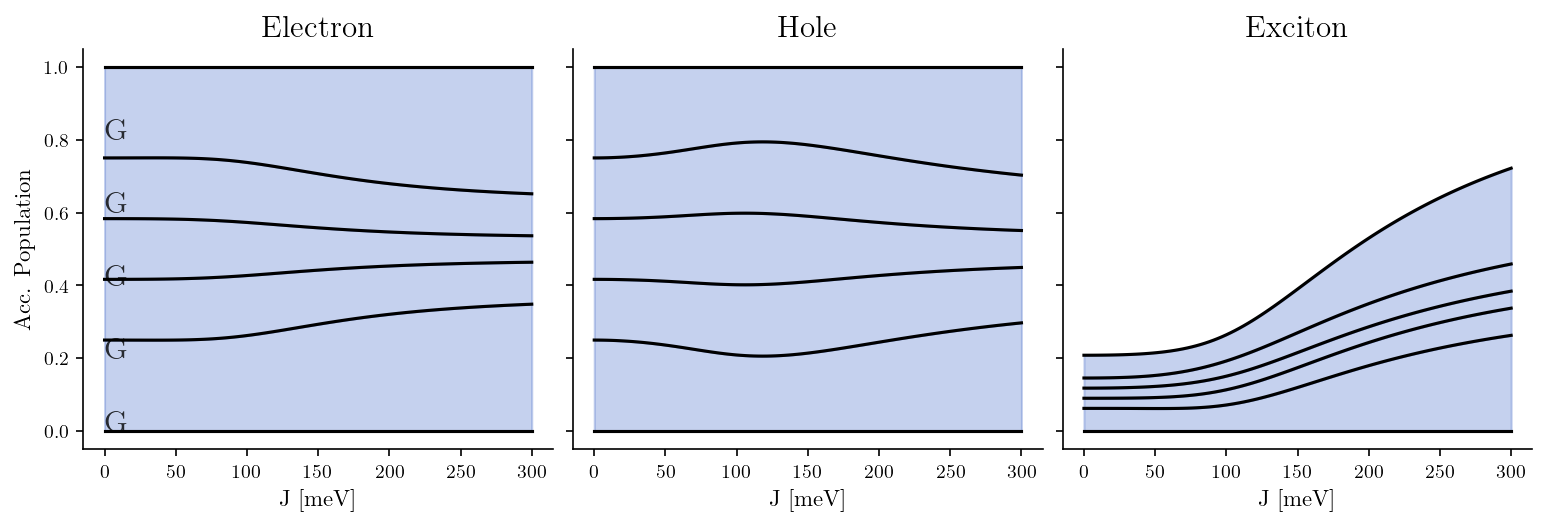

In [17]:
def figS3a(source = 'Simserides2014',
          upper_strand = 'GGGGG', 
          tb_model_name = 'WM',
          J_list = np.linspace(0, 300, 100), 
          J_unit = 'meV'):

    tb_sites = get_tb_sites(upper_strand, tb_model_name=tb_model_name)
    vis = Visualization(tb_sites, tb_model_name=tb_model_name, source=source)
    vis.plot_average_pop(J_list, J_unit)

    return fig

fig = figS3a()
if save:
    save_figure(fig, 'Fig_S3a', SAVE_DIR, extension='pdf')
plt.show()

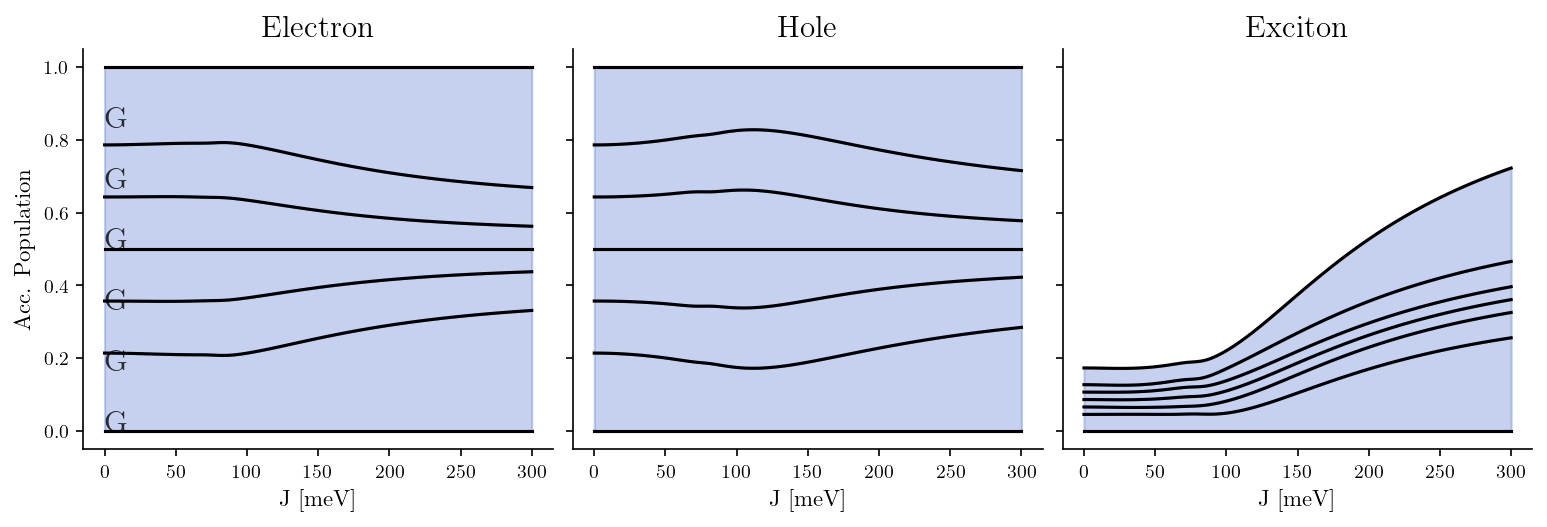

In [18]:
def figS3b(source = 'Simserides2014',
          upper_strand = 'GGGGGG', 
          tb_model_name = 'WM',
          J_list = np.linspace(0, 300, 100), 
          J_unit = 'meV'):

    tb_sites = get_tb_sites(upper_strand, tb_model_name=tb_model_name)
    vis = Visualization(tb_sites, tb_model_name=tb_model_name, source=source)
    vis.plot_average_pop(J_list, J_unit)

    return fig

fig = figS3b()
if save:
    save_figure(fig, 'Fig_S3b', SAVE_DIR, extension='pdf')
plt.show()

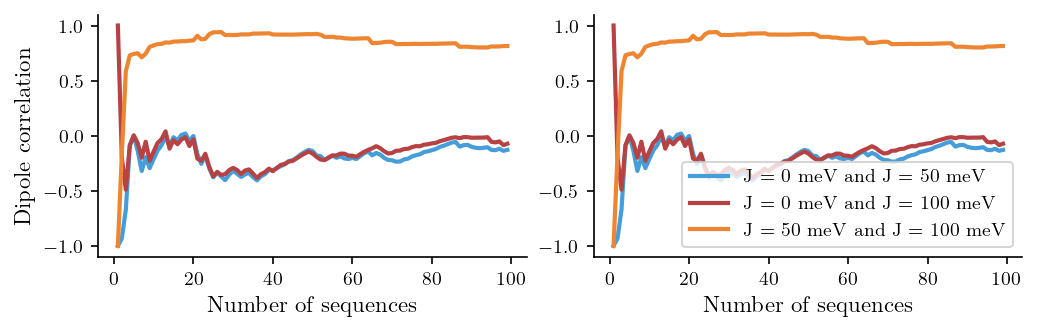

In [19]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

def figS4(num_sequences = 101):

    directory = DATA_DIR
    dominant_filename = 'dipole_7bp_J0.json'
    
    fig, ax = plt.subplots(1,2, figsize=(3.4*2, 2.1))
    for J1, J2 in [[0,0.5],[0,1],[0.5,1]]:
        filename1, filename2 = f'dipole_7bp_J{J1}.json', f'dipole_7bp_J{J2}.json'
        A = get_sorted_dict(dominant_filename, filename1, directory)
        B = get_sorted_dict(dominant_filename, filename2, directory)
        corr_list=[]
        for x in range(1,num_sequences):
            corr_list.append( np.corrcoef(list(B.values())[:x],list(A.values())[:x])[0, 1] )
        ax[0].plot(corr_list[:num_sequences])
        ax[1].plot(corr_list[:num_sequences])
    
    ax[1].legend([r'J = 0 meV and J = 50 meV','J = 0 meV and J = 100 meV','J = 50 meV and J = 100 meV'])
    ax[0].set_ylabel('Dipole correlation')
    ax[0].set_xlabel('Number of sequences')
    ax[1].set_xlabel('Number of sequences')

    return fig

fig = figS4()
if save:
    save_figure(fig, 'Fig_S4', SAVE_DIR, extension='pdf')
plt.show()

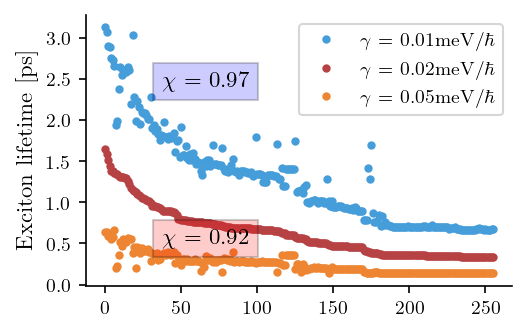

In [20]:
from qDNA import get_sorted_dict, get_correlation, save_figure

def figS5():
    directory = DATA_DIR
    dominant_filename = 'lifetime_4bp_relax0.02.json'
    
    fig, ax = plt.subplots()
    for relax_rate in [0.01, 0.02, 0.05]:
        filename = f'lifetime_4bp_relax{relax_rate}.json'
        lifetime_dict = get_sorted_dict(dominant_filename, filename, directory)
        ax.plot( np.array( list(lifetime_dict.values()) )/1000, '.', markersize=6, label=r"$\gamma$ = " + f"{relax_rate}" + r"meV/$\hbar$")
    
    ax.set_ylabel(r'Exciton lifetime [ps]')
    ax.legend(frameon=True)
    
    chi_1 = np.round( get_correlation(dominant_filename, 'lifetime_4bp_relax0.01.json', directory), 2)
    chi_2 = np.round( get_correlation(dominant_filename, 'lifetime_4bp_relax0.05.json', directory), 2)
    fig.text(0.3, 0.75, r'$\chi$ = ' + f'{chi_1}', bbox=dict(facecolor='blue', alpha=0.2))
    fig.text(0.3, 0.25, r'$\chi$ = ' + f'{chi_2}', bbox=dict(facecolor='red', alpha=0.2))

    return fig

fig = figS5()
if save:
    save_figure(fig, 'Fig_S5', SAVE_DIR, extension='pdf')
plt.show()